# 1.平均と分散

## 1.1　ポテトの長さの平均は

- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec1.html
- テーマ
   1. csvファイルの読み込み
   2. DataFrameの取扱い
    - 特定の列だけ抽出
    - 表形式で表示(jupyter notebook)
   3. 統計量の算出
    - 平均値、(不偏)標準偏差、四分位点等

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# csvからデータの読み込み
dataset_wak = pd.read_csv('./data/chapter1-1_wak.csv', names=('num', 'length_wak') )
dataset_mog = pd.read_csv('./data/chapter1-1_mog.csv', names=('num', 'length_mog') )

# lengthだけ抽出して別のデータフレームに格納
df_wak_length = dataset_wak.length_wak
df_mog_length = dataset_mog.length_mog

# 試しにlengthを1つのDataFrameに纏めてみる
df_length = pd.concat([df_wak_length, df_mog_length], axis=1)

# デフォルトで出せる統計量を表示
#df_length.mean()
df_length.describe()

,length_wak,length_mog
count,49.000000,49.000000
mean,4.571429,4.614286
std,0.833667,1.624423
min,2.800000,0.800000
25%,3.900000,3.300000
50%,4.400000,4.500000
75%,5.200000,5.800000
max,6.400000,7.700000


## 1.2　度数分布

- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec2.html
- テーマ
   1. matplotlibによるヒストグラムの作成
    - 複数のグラフを1つの図に入れる
    - grid表示
    - 横軸固定
    - 色指定(半透明(=alpha)含む)
    - binsの指定

(array([  0.,   1.,   2.,  12.,   9.,   9.,   9.,   4.,   3.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Patch objects>)

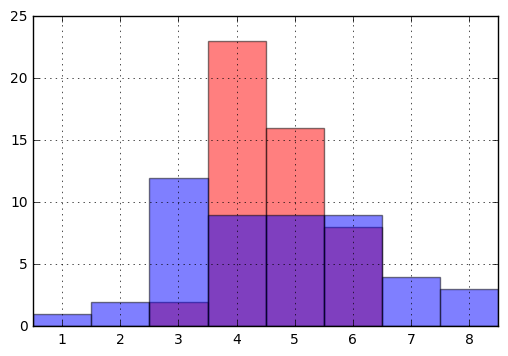

In [3]:
# gridの表示
plt.grid()

# ヒストグラムの本数
bins_num = 9

# 横軸の固定
plt.xlim([0.5, 8.5])

# 半透明で重ねる
plt.hist(df_wak_length, bins=bins_num, range=(-0.5, 8.5), color = 'red', alpha=0.5)
plt.hist(df_mog_length, bins=bins_num, range=(-0.5, 8.5), color = 'blue', alpha=0.5)

# 横に並べる
#plt.hist([df_wak_length, df_mog_length],  bins=bins_num, range=(-0.5, 8.5), color = ['red', 'blue'])

## 1.3　ばらつきを数字にする
- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec3.html
- テーマ
   1. 読み物オンリーページ


## 1.4　分散と標準偏差

- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec4.html
- テーマ
   1. 分散の算出
    - 分散は.var()で求めることが出来る
        - ただし、pandasのデフォルトは不偏分散であることに注意する
        - 標本分散を求める場合は「ddof=0」を指定する
        - "ddof"は自由度を指定するためのオプション(default=1のため、不偏分散になる。0を設定で標本分散)
   2. 標準偏差の算出
    - 標準偏差は.std()で求めることが出来る
        - 分散と同様に、デフォルトは不偏標準偏差。
        - 標本標準偏差を求める場合は、分散と同様に「ddof=0」を指定する

In [4]:
# 不偏分散
var_unbiased = df_length.var()

# 標本分散
var_sample = df_length.var(ddof=0)

# 不偏標準偏差
std_unbiased = df_length.std()

# 標本標準偏差
std_sample = df_length.std(ddof=0)

# 並べて表形式で表示
var_std_list = pd.concat([var_unbiased, var_sample, std_unbiased, std_sample],  axis=1)
var_std_list.columns = ['var_unbiased', 'var_sample', 'std_unbiased', 'std_sample']
var_std_list

,var_unbiased,var_sample,std_unbiased,std_sample
length_wak,0.69500,0.680816,0.833667,0.825116
length_mog,2.63875,2.584898,1.624423,1.607762


## 1.5　実践編：チキンでいこう

- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec5.html
- テーマ
   1. csvファイルの読み込み
     - 1ファイルに3列以上のデータが入っている場合の取り扱い
   2. DataFrameの取り扱い
     - 特定の列だけ削除(.drop)
         - 特定の行だけ削除する場合は'axis=1'が不要。かつ行数を指定する。
   3. 統計量算出のまとめ
     - 平均、分散、標準偏差

In [8]:
# csvからデータの読み込み
dataset_weight = pd.read_csv('./data/chapter1-5_chicken.csv', names=('num', 'weight_wak', 'weight_mog') )

# 読み込んだデータからnum列を削除
dataset_weight = dataset_weight.drop('num', axis=1)

# 平均、標本分散、標本標準偏差を算出
chicken_mean = dataset_weight.mean()
chicken_var = dataset_weight.var(ddof=0)
chicken_std = dataset_weight.std(ddof=0)

# 上で求めた統計量を纏めて表にする
chichen_stat_list = pd.concat([chicken_mean, chicken_var, chicken_std], axis=1)
chichen_stat_list.columns = ['chichken_mean', 'chicken_var', 'chicken_std']
chichen_stat_list

,chichken_mean,chicken_var,chicken_std
weight_wak,146.3125,56.339844,7.505987
weight_mog,149.4375,260.621094,16.143763


## 1.9　通過テスト

- URL : http://kogolab.chillout.jp/elearn/hamburger/chap1/sec9.html
- テーマ
    - 下記の理解度チェック
       1. csvファイルの読み込み
           - 特に、1行目にヘッダーとして列名が記載されているcsvを読み込む場合の処理
       2. DataFrameの取り扱い
       3. 統計量算出


In [7]:
# csvからデータの読み込み(先頭行はヘッダーとして認識される)
dataset_practice = pd.read_csv('./data/chapter1-9.csv')

# 以下の記述でcsvを読むと、ヘッダー行も値として読み込まれるため、統計量が正常に算出出来ない
#dataset_practice = pd.read_csv('chapter1-9.csv', names=('num', 'sakura', 'momo', 'yanagi') )

# 読み込んだデータからnum列を削除
dataset_practice = dataset_practice.drop('num', axis=1)

# 平均、標本分散、標本標準偏差を算出
practice_mean = dataset_practice.mean()
practice_var  = dataset_practice.var(ddof=0)
practice_std  = dataset_practice.std(ddof=0)

# 上で求めた統計量を纏めて表にする
practice_stat_list = pd.concat([practice_mean, practice_var, practice_std], axis=1)
practice_stat_list.columns = ['practice_mean', 'practice_var', 'practice_std']
practice_stat_list

,practice_mean,practice_var,practice_std
sakura,70.0,58.153846,7.625867
momo,70.0,26.923077,5.188745
yanagi,57.0,26.923077,5.188745
